# 🎯 **Kaggle Competition Strategy**

---

## 📋 **Competition Details**

### **Competition Name:** Playground Series - Season 5, Episode 7

### **Task:** Predict the Introverts from the Extroverts

### **Problem Type:** Binary Classification 

### **Start Date:** Jul 1, 2025

### **End Date:** Aug 1, 2025

---

# **Phase 1: Data Exploration & Understanding**

## **1. Load training and test datasets**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


## **2. Examine data shape, structure, and dimensions**

In [4]:
df_train.info()
print(f'Train shape: {df_train.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
Train shape: (18524, 9)


In [5]:
df_test.info()
print(f'Test shape: {df_test.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB
Test shape: (6175, 8)


In [6]:
df_train.drop(columns=['id',], inplace=True)

## **3. Identify the target variable (introvert vs extrovert)**

In [7]:
df_train['Personality'] = df_train['Personality'].map({'Introvert': 0, 'Extrovert': 1})
df_train['Personality']

0        1
1        1
2        0
3        1
4        1
        ..
18519    1
18520    1
18521    0
18522    0
18523    1
Name: Personality, Length: 18524, dtype: int64

## **4. Analyze all feature types (numerical, categorical, text)**

In [8]:
num_cols = []
for col in df_train.columns:
    if df_train[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
cat_cols = []
for col in df_train.columns:
    if col not in num_cols:
        cat_cols.append(col)
print(f'Numerical columns: {num_cols}')
print(f'Categorical columns: {cat_cols}')

Numerical columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']
Categorical columns: ['Stage_fear', 'Drained_after_socializing']


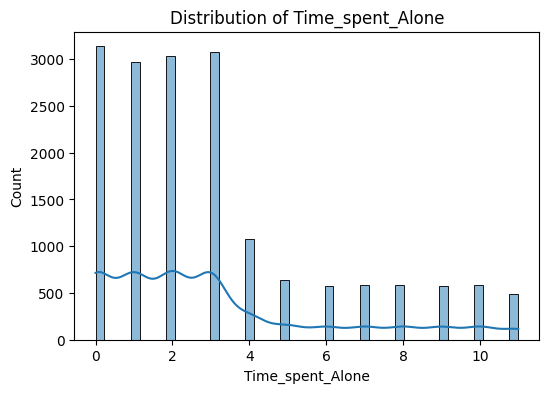

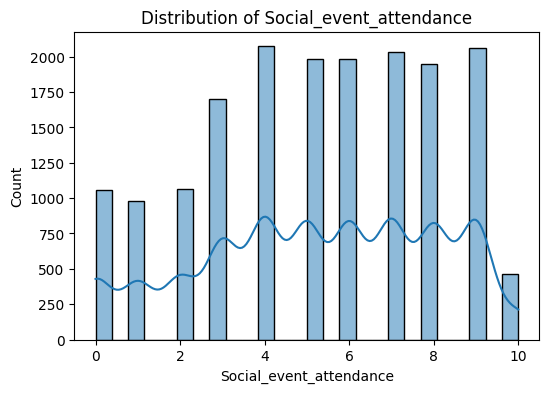

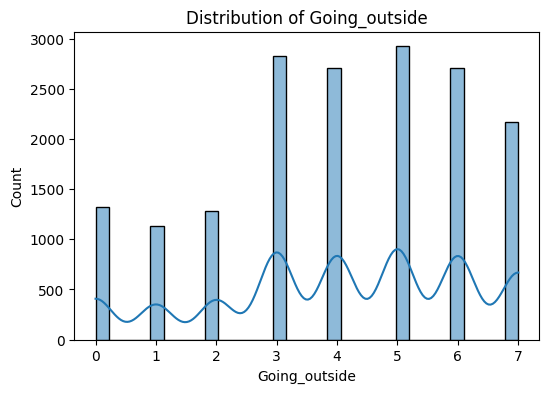

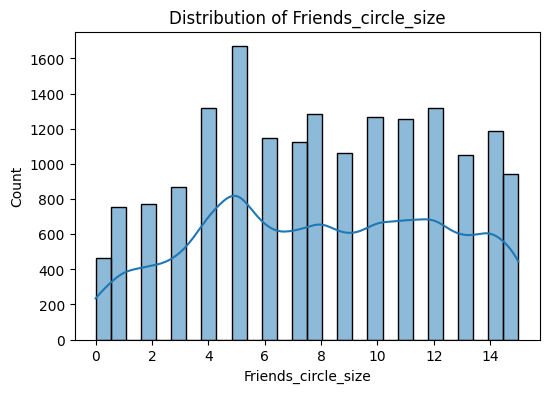

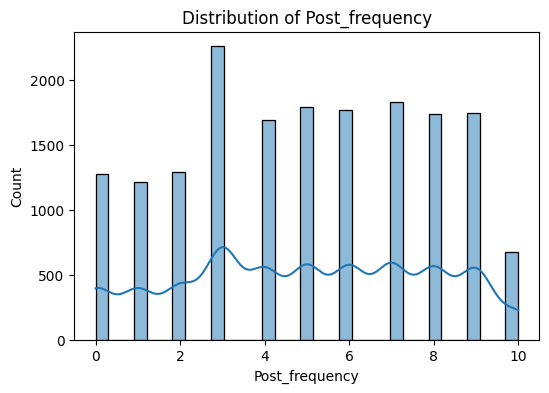

In [9]:
for col in num_cols:
    if col != 'Personality':
        plt.figure(figsize=(6,4))
        sns.histplot(df_train[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

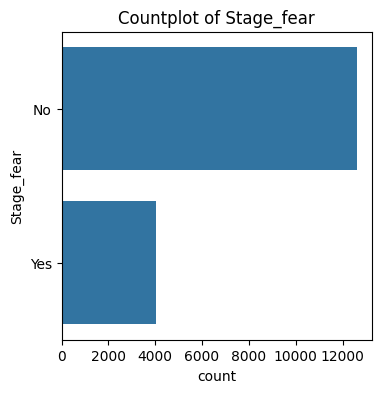

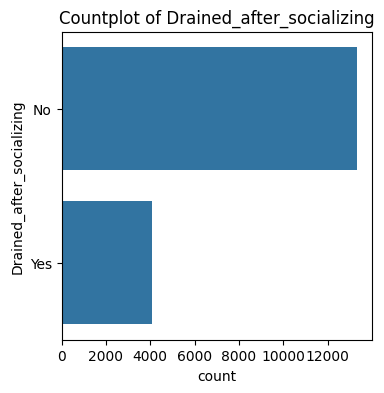

In [10]:
for col in cat_cols:
    plt.figure(figsize=(4,4))
    sns.countplot(y=df_train[col])
    plt.title(f'Countplot of {col}')
    plt.show()

## **5. Check for missing values and their patterns**

In [11]:
df_train.isnull().sum().sort_values(ascending=False).head(9)

Stage_fear                   1893
Going_outside                1466
Post_frequency               1264
Time_spent_Alone             1190
Social_event_attendance      1180
Drained_after_socializing    1149
Friends_circle_size          1054
Personality                     0
dtype: int64

In [12]:
df_test.isnull().sum().sort_values(ascending=False).head(8)

Stage_fear                   598
Going_outside                466
Drained_after_socializing    432
Time_spent_Alone             425
Post_frequency               408
Social_event_attendance      397
Friends_circle_size          350
id                             0
dtype: int64

## **6. Analyze target variable distribution (balanced/imbalanced)**

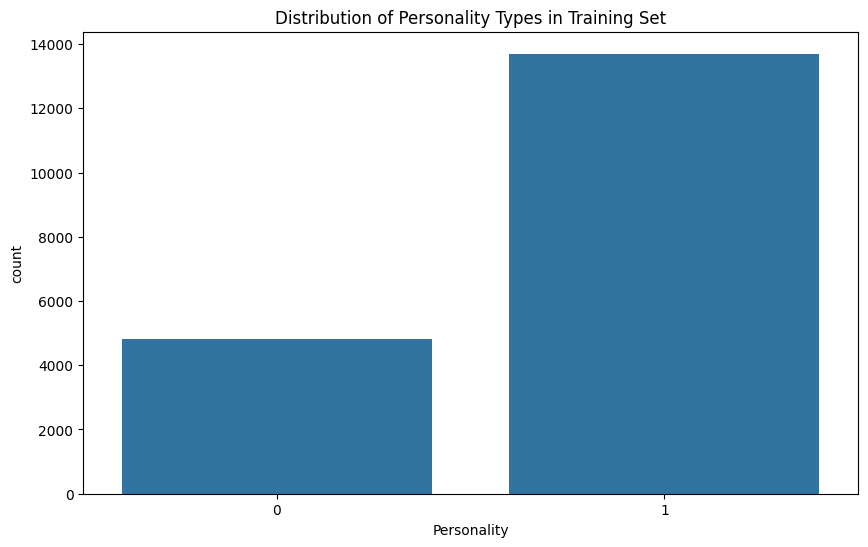

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Personality', data=df_train)
plt.title('Distribution of Personality Types in Training Set')
plt.show()

---
# **Phase 2: Exploratory Data Analysis (EDA)**

## **1. Descriptive Statistics**

In [14]:
df_train.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000,18524.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097,0.739527
std,3.003786,2.753359,2.062580,4.223484,2.879139,0.438905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000,0.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000,1.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000,1.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


In [ ]:
for col in cat_cols:
    if col != 'Personality':    
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)
for col in num_cols:
    if col != 'Personality':    
        df_train[col].fillna(df_train[col].median(), inplace=True)
        df_test[col].fillna(df_test[col].median(), inplace=True)

## **2. Correlations between features and target**

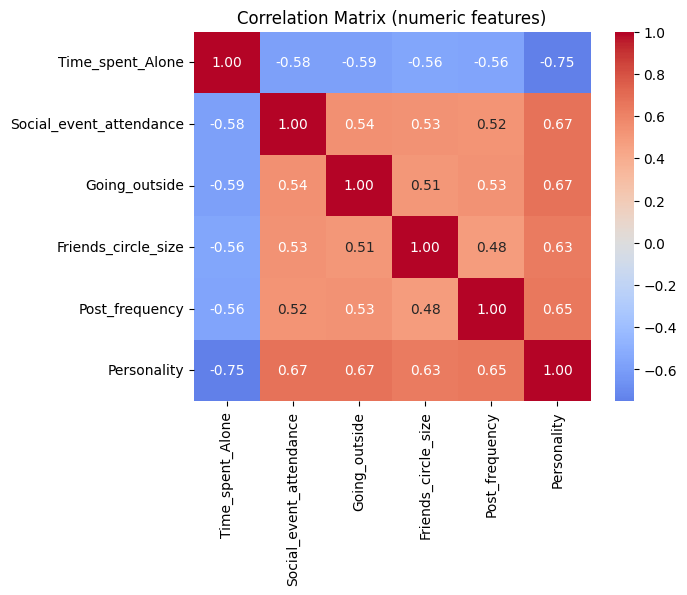

In [17]:
corr_num = df_train[num_cols].corr(method='pearson')
sns.heatmap(corr_num, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (numeric features)')
plt.show()

In [18]:
cat_cols.append('Personality')

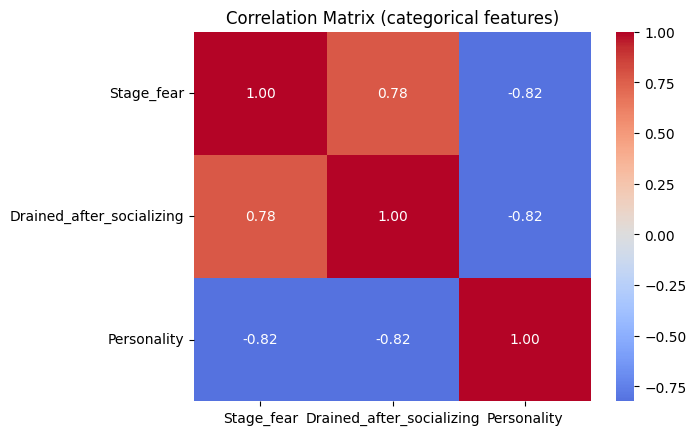

In [19]:
corr_cat = df_train[cat_cols].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
sns.heatmap(corr_cat, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (categorical features)')
plt.show()

## **3. Detect outliers in numerical features**

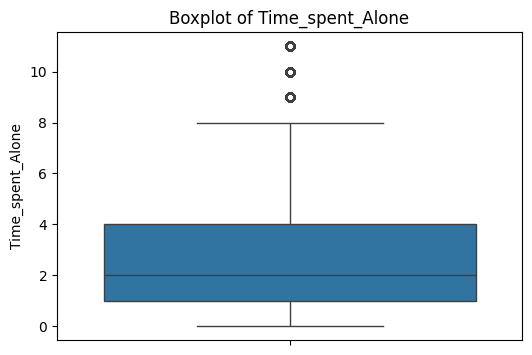

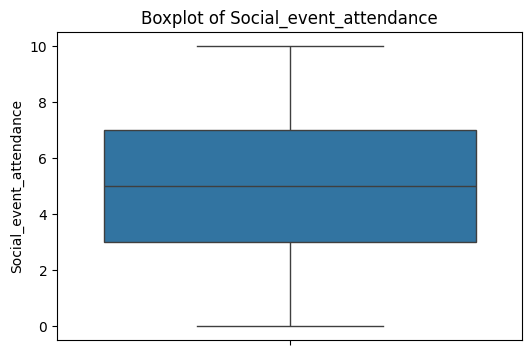

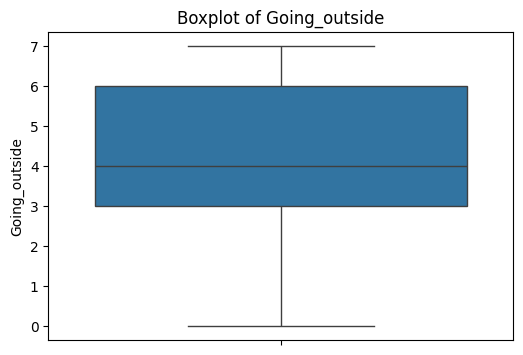

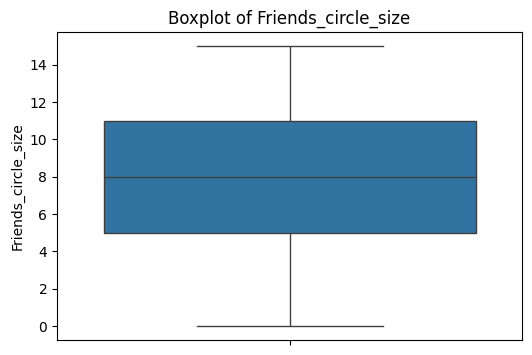

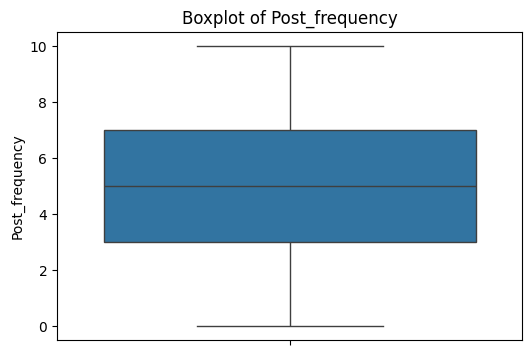

In [20]:
for col in num_cols:
    if col != 'Personality':
        plt.figure(figsize=(6,4))
        sns.boxplot(df_train[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

---

# **Phase 3: Feature Engineering**

## **1. Encoding**

In [21]:
df_train["Drained_after_socializing"] = df_train["Drained_after_socializing"].map({'Yes': 1, 'No': 0})
df_train['Stage_fear'] = df_train['Stage_fear'].map({'Yes': 1, 'No': 0})
df_test["Drained_after_socializing"] = df_test["Drained_after_socializing"].map({'Yes': 1, 'No': 0})
df_test['Stage_fear'] = df_test['Stage_fear'].map({'Yes': 1, 'No': 0})

## **2. Feature Creating**

In [22]:
df_train["Time_spent_not_Allone"] = -1*df_train["Time_spent_Alone"]
df_test["Time_spent_not_Allone"] = -1*df_test["Time_spent_Alone"]
df_train['opposite_Stage_fear'] = 1 - df_train['Stage_fear']
df_train['opposite_Drained_after_socializing'] = 1 - df_train['Drained_after_socializing']
df_test['opposite_Stage_fear'] = 1 - df_test['Stage_fear']
df_test['opposite_Drained_after_socializing'] = 1 - df_test['Drained_after_socializing']

In [23]:
df_train.drop(columns=['Time_spent_Alone'], inplace=True)
df_test.drop(columns=['Time_spent_Alone'], inplace=True)
num_cols.remove('Time_spent_Alone')
num_cols.append('Time_spent_not_Allone')

In [24]:
df_train.drop(columns=['Stage_fear', 'Drained_after_socializing'], inplace=True)
df_test.drop(columns=['Stage_fear', 'Drained_after_socializing'], inplace=True)

In [25]:
cat_cols.append('opposite_Stage_fear')
cat_cols.append('opposite_Drained_after_socializing')
cat_cols.remove('Stage_fear')
cat_cols.remove('Drained_after_socializing')

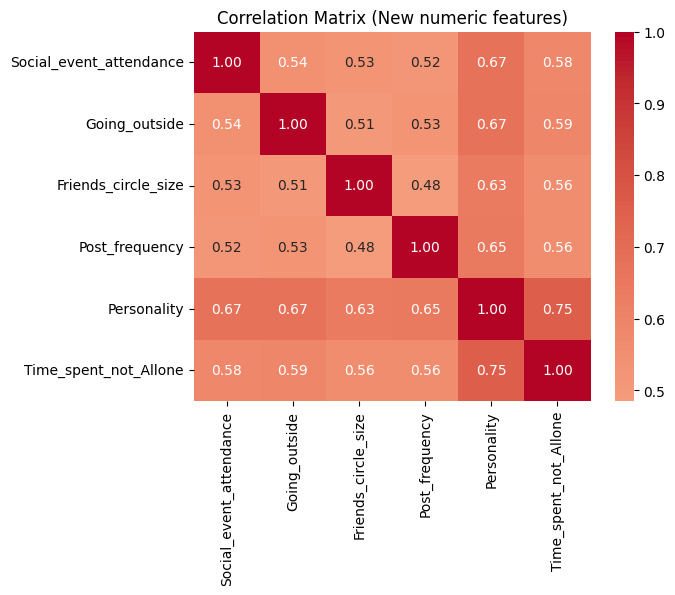

In [26]:
corr_num = df_train[num_cols].corr(method='pearson')
sns.heatmap(corr_num, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (New numeric features)')
plt.show()

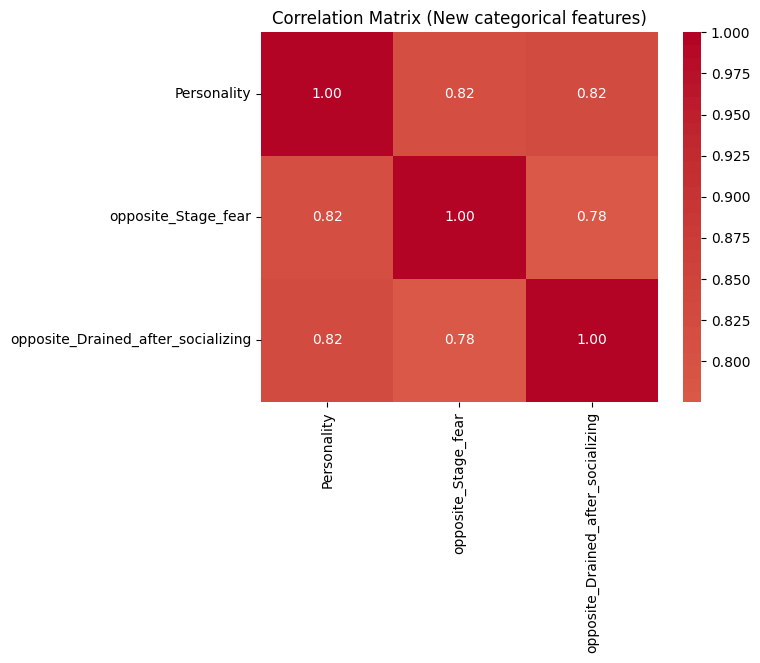

In [27]:
corr_cat = df_train[cat_cols].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
sns.heatmap(corr_cat, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (New categorical features)')
plt.show()

# **Phase 4: Scaling**

## **1. Standardization**

In [28]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [col for col in num_cols if col != 'Personality']

scaler = StandardScaler()
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

df_train['Personality'] = StandardScaler().fit_transform(df_train[['Personality']])

df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

---

# **Phase 5: Model Selection & Training**


## **1. Model Selection**

## **Models: XGBoost, Random Forest, SVM**

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, auc, roc_curve,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [30]:
x = df_train.drop(columns=['Personality'])
y = df_train['Personality']
x.columns

Index(['Social_event_attendance', 'Going_outside', 'Friends_circle_size',
       'Post_frequency', 'Time_spent_not_Allone', 'opposite_Stage_fear',
       'opposite_Drained_after_socializing'],
      dtype='object')

In [31]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_val.columns

Index(['Social_event_attendance', 'Going_outside', 'Friends_circle_size',
       'Post_frequency', 'Time_spent_not_Allone', 'opposite_Stage_fear',
       'opposite_Drained_after_socializing'],
      dtype='object')

## **2. Checking Feature Importance**

In [32]:
y_train = (y_train > 0).astype(int)  
y_val = (y_val > 0).astype(int)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_names = list(x.columns)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(7)

,Feature,Importance
6,opposite_Drained_after_socializing,0.230771
5,opposite_Stage_fear,0.230154
4,Time_spent_not_Allone,0.192198
0,Social_event_attendance,0.133422
3,Post_frequency,0.089055
1,Going_outside,0.083845
2,Friends_circle_size,0.040555


## **3. Cross-Validation**

In [ ]:
# Hyperparameter Tuning with Grid Search
param_grid_xgb = {
    "n_estimators": [100],
    "learning_rate": [0.1],
    "max_depth": [4],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.9],
    "reg_alpha": [0.1,0.2],
    "reg_lambda": [2.0,2.5]
}

param_grid_rf = {
    "n_estimators": [200,250],
    "max_depth": [8],
    "min_samples_split": [4,5],
    "min_samples_leaf": [2,3]
}

param_grid_svm = {
    "C": [0.1, .5, .075],
    "gamma": ['scale'],
    "kernel": ['linear']
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=1,
    verbose=0,
)
grid_search_xgb.fit(X_train, y_train)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=1,
    verbose=0
)
grid_search_rf.fit(X_train, y_train)

grid_search_svm = GridSearchCV(
    estimator=make_pipeline(SimpleImputer(strategy='mean'), SVC(random_state=42)),
    param_grid={
        'svc__C': param_grid_svm['C'],
        'svc__gamma': param_grid_svm['gamma'],
        'svc__kernel': param_grid_svm['kernel']
    },
    scoring='f1',
    cv=5,
    n_jobs=1,
    verbose=0
)
grid_search_svm.fit(X_train, y_train)

xgb_parameters = grid_search_xgb.best_params_
print("\n--- XGBoost Results ---")
print("Best XGBoost Parameters: ", xgb_parameters)
print(f"Best XGBoost F1 Score: {grid_search_xgb.best_score_}")

rf_parameters = grid_search_rf.best_params_
print("\n--- Random Forest Results ---")
print("Best Random Forest Parameters: ", rf_parameters)
print(f"Best Random Forest F1 Score: {grid_search_rf.best_score_}")

svm_parameters = grid_search_svm.best_params_
print("\n--- SVM Results ---")
print("Best SVM Parameters: ", svm_parameters)
print(f"Best SVM F1 Score: {grid_search_svm.best_score_}")


# Evaluate models with cross-validation using the best parameters
xgb_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    XGBClassifier(**xgb_parameters, use_label_encoder=False, eval_metric='logloss', random_state=42)
)
k_folds = KFold(n_splits=10)

scores_xgb = cross_val_score(xgb_pipe, X_train, y_train, cv=k_folds)
print("XGBoost Cross Validation Scores: ", scores_xgb)
print("XGBoost Average CV Score: ", scores_xgb.mean())
print("XGBoost Number of CV Scores used in Average: ", len(scores_xgb))

rf_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(**rf_parameters)
)
scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=k_folds)
print("Random Forest Cross Validation Scores: ", scores_rf)
print("Random Forest Average CV Score: ", scores_rf.mean())
print("Random Forest Number of CV Scores used in Average: ", len(scores_rf))

svm_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    SVC(random_state=42)
)
svm_pipe.set_params(**svm_parameters)
scores_svm = cross_val_score(svm_pipe, X_train, y_train, cv=k_folds)
print("SVM Cross Validation Scores: ", scores_svm)
print("SVM Average CV Score: ", scores_svm.mean())
print("SVM Number of CV Scores used in Average: ", len(scores_svm))

--- XGBoost Results ---
Best XGBoost Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.9}
Best XGBoost F1 Score: 0.9798207145600039

--- Random Forest Results ---
Best Random Forest Parameters:  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best Random Forest F1 Score: 0.9797237573580263

--- SVM Results ---
Best SVM Parameters:  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best SVM F1 Score: 0.9796841698497543

XGBoost Cross Validation Scores:  [0.97098516 0.97908232 0.96356275 0.97435897 0.96693657 0.97503374
 0.96963563 0.96356275 0.96896086 0.96758947]
XGBoost Average CV Score:  0.9699708225011185
XGBoost Number of CV Scores used in Average:  10

Random Forest Cross Validation Scores:  [0.97098516 0.97840756 0.96423752 0.97233468 0.96693657 0.9757085
 0.97031039 0.96288799 0.97098516 0.96758947]
Random Forest Average CV Score:  0.9700382988843843
Random Forest Number of CV Scores used in Average:  10

SVM Cross Validation Scores:  [0.97031039 0.97773279 0.96423752 0.97165992 0.96693657 0.97705803
 0.97031039 0.96288799 0.97031039 0.96758947]
SVM Average CV Score:  0.9699033461178527
SVM Number of CV Scores used in Average:  10

---

# **Phase 6: Ensemble Methods**

## **1. **Stacking:** Layer multiple models with a meta-learner**


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('xgb', xgb_pipe),
    ('rf', rf_pipe),
    ('svm', svm_pipe)]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(**rf_parameters))
stacking_clf.fit(X_train, y_train)
stacking_scores = cross_val_score(stacking_clf, X_train, y_train, cv=k_folds)
print("\n--- Stacking Classifier Results ---")
print("Stacking Classifier Cross Validation Scores: ", stacking_scores)
print("Stacking Classifier Average CV Score: ", stacking_scores.mean())
print("Stacking Classifier Number of CV Scores used in Average: ", len(stacking_scores))

--- Stacking Classifier Results ---

Stacking Classifier Cross Validation Scores:  [0.97031039 0.97840756 0.96018893 0.97233468 0.96626181 0.97503374
 0.97031039 0.96153846 0.97031039 0.96758947]
Stacking Classifier Average CV Score:  0.9692285822851942
Stacking Classifier Number of CV Scores used in Average:  10

## **2. **Voting:** Majority vote or soft voting**

In [ ]:
from sklearn.ensemble import VotingClassifier

svm_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    SVC(random_state=42, probability=True)  
)

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_pipe),
        ('rf', rf_pipe),
        ('svm', svm_pipe)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
voting_scores = cross_val_score(voting_clf, X_train, y_train, cv=k_folds)
print("\n--- Voting Classifier Results ---")
print("Voting Classifier Cross Validation Scores: ", voting_scores)
print("Voting Classifier Average CV Score: ", voting_scores.mean())
print("Voting Classifier Number of CV Scores used in Average: ", len(voting_scores))

--- Voting Classifier Results ---

Voting Classifier Cross Validation Scores:  [0.97031039 0.97908232 0.96288799 0.97233468 0.96626181 0.97638327
 0.97031039 0.96221323 0.96963563 0.96758947]
Voting Classifier Average CV Score:  0.9697009169680552
Voting Classifier Number of CV Scores used in Average:  10

---

# **Phase 7: Model Evaluation & Analysis**


--- Basic Model Evaluation on Validation Set ---
Confusion Matrix for XGBoost on Validation Set:
[[ 892   73]
 [  54 2686]]
Precision for XGBoost on Validation Set: 0.9735411380935122
Recall for XGBoost on Validation Set: 0.9802919708029197
F1 Score for XGBoost on Validation Set: 0.9769048917985088
Confusion Matrix for Random Forest on Validation Set:
[[ 893   72]
 [  55 2685]]
Precision for Random Forest on Validation Set: 0.9738846572361263
Recall for Random Forest on Validation Set: 0.9799270072992701
F1 Score for Random Forest on Validation Set: 0.9768964889939967
Confusion Matrix for SVM on Validation Set:
[[ 891   74]
 [  56 2684]]
Precision for SVM on Validation Set: 0.9731689630166788
Recall for SVM on Validation Set: 0.9795620437956204
F1 Score for SVM on Validation Set: 0.9763550381957076
Precision for SVM on Validation Set: 0.9731689630166788
Recall for SVM on Validation Set: 0.9795620437956204
F1 Score for SVM on Validation Set: 0.9763550381957076

--- Ensemble Model Evalu

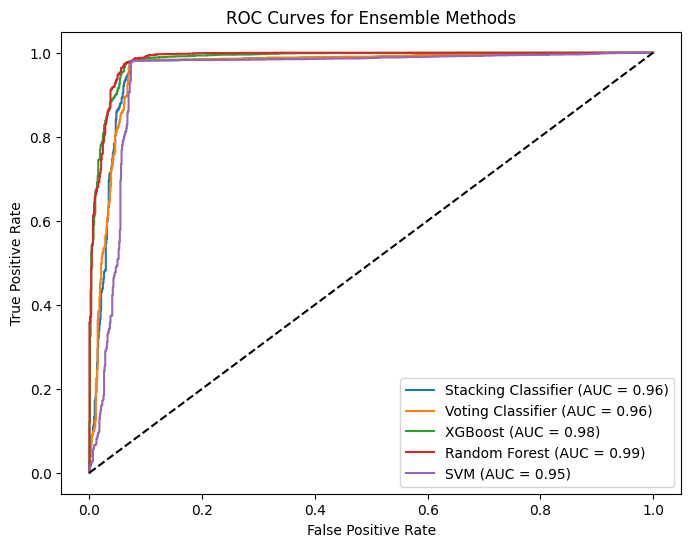

In [36]:
xgb = XGBClassifier(**xgb_parameters)
rf = RandomForestClassifier(**rf_parameters)
svm = make_pipeline(SimpleImputer(strategy='mean'), SVC(probability=True, random_state=42))
svm.set_params(**svm_parameters)

# Fit all models
xgb.fit(X_val, y_val)
rf.fit(X_val, y_val)
svm.fit(X_val, y_val)

print("\n--- Basic Model Evaluation on Validation Set ---")

# Use the already-fitted estimators (do not re-instantiate them here)
cm_xgb = confusion_matrix(y_val, xgb.predict(X_val))
pr_xgb = precision_score(y_val, xgb.predict(X_val))
rec_xgb = recall_score(y_val, xgb.predict(X_val))
f1_xgb = f1_score(y_val, xgb.predict(X_val))
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])
roc_xgb = auc(fpr_xgb, tpr_xgb)
print("Confusion Matrix for XGBoost on Validation Set:")
print(cm_xgb)
print(f"Precision for XGBoost on Validation Set: {pr_xgb}")
print(f"Recall for XGBoost on Validation Set: {rec_xgb}")
print(f"F1 Score for XGBoost on Validation Set: {f1_xgb}")

cm_rf = confusion_matrix(y_val, rf.predict(X_val))
pr_rf = precision_score(y_val, rf.predict(X_val))
rec_rf = recall_score(y_val, rf.predict(X_val))
f1_rf = f1_score(y_val, rf.predict(X_val))
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
roc_rf = auc(fpr_rf, tpr_rf)
print("Confusion Matrix for Random Forest on Validation Set:")
print(cm_rf)
print(f"Precision for Random Forest on Validation Set: {pr_rf}")
print(f"Recall for Random Forest on Validation Set: {rec_rf}")
print(f"F1 Score for Random Forest on Validation Set: {f1_rf}")

cm_svm = confusion_matrix(y_val, svm.predict(X_val))
pr_svm = precision_score(y_val, svm.predict(X_val))
rec_svm = recall_score(y_val, svm.predict(X_val))
f1_svm = f1_score(y_val, svm.predict(X_val))
fpr_svm, tpr_svm, _ = roc_curve(y_val, svm.predict_proba(X_val)[:,1])
roc_svm = auc(fpr_svm, tpr_svm)
print("Confusion Matrix for SVM on Validation Set:")
print(cm_svm)
print(f"Precision for SVM on Validation Set: {pr_svm}")
print(f"Recall for SVM on Validation Set: {rec_svm}")
print(f"F1 Score for SVM on Validation Set: {f1_svm}")
print(f"Precision for SVM on Validation Set: {pr_svm}")
print(f"Recall for SVM on Validation Set: {rec_svm}")
print(f"F1 Score for SVM on Validation Set: {f1_svm}")

print("\n--- Ensemble Model Evaluation on Validation Set ---")

cm_stack = confusion_matrix(y_val, stacking_clf.predict(X_val))
pr_stack = precision_score(y_val, stacking_clf.predict(X_val))
rec_stack = recall_score(y_val, stacking_clf.predict(X_val))
f1_stack = f1_score(y_val, stacking_clf.predict(X_val))
roc_stack = roc_curve(y_val, stacking_clf.predict_proba(X_val)[:,1])
fpr_stack, tpr_stack, _ = roc_curve(y_val, stacking_clf.predict_proba(X_val)[:,1])
roc_stack = auc(fpr_stack, tpr_stack)
print("Confusion Matrix for Stacking Classifier on Validation Set:")
print(cm_stack)
print(f"Precision for Stacking Classifier on Validation Set: {pr_stack}")
print(f"Recall for Stacking Classifier on Validation Set: {rec_stack}")
print(f"F1 Score for Stacking Classifier on Validation Set: {f1_stack}")

cm_voting = confusion_matrix(y_val, voting_clf.predict(X_val))
pr_voting = precision_score(y_val, voting_clf.predict(X_val))
rec_voting = recall_score(y_val, voting_clf.predict(X_val))
f1_voting = f1_score(y_val, voting_clf.predict(X_val))
fpr_voting, tpr_voting, _ = roc_curve(y_val, voting_clf.predict_proba(X_val)[:,1])
roc_voting = roc_curve(y_val, voting_clf.predict_proba(X_val)[:,1])
print("Confusion Matrix for Voting Classifier on Validation Set:")
print(cm_voting)
print(f"Precision for Voting Classifier on Validation Set: {pr_voting}")
print(f"Recall for Voting Classifier on Validation Set: {rec_voting}")
print(f"F1 Score for Voting Classifier on Validation Set: {f1_voting}")


print("\n--- ROC Curves for Ensemble methods ---")
plt.figure(figsize=(8,6))
plt.plot(fpr_stack, tpr_stack, label=f'Stacking Classifier (AUC = {roc_stack:.2f})')
plt.plot(roc_voting[0], roc_voting[1], label=f'Voting Classifier (AUC = {auc(roc_voting[0], roc_voting[1]):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Ensemble Methods')
plt.legend()
plt.show()

---

# **Phase 8: Submission & Iteration**

In [37]:
df = pd.read_csv('../submission/sample_submission.csv')
df.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


## **1. XGBoost**

In [38]:
ids = df_test['id'].values
X_sub = df_test.drop(columns=['id'])


submission_xgb = pd.DataFrame({
    'id': ids,
    'Personality': ['Extrovert' if pred == 1 else 'Introvert' for pred in xgb.predict(X_sub)]
})
submission_xgb.to_csv('../submission/introvert_extrovert_xgb.csv', index=False)

print("\n--- Submission File Created for XGBoost ---")
submission_xgb.head()


--- Submission File Created for XGBoost ---


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## **2. Random Forest**

In [39]:
submission_rf = pd.DataFrame({
    'id': df_test.index+18524,
    'Personality': ['Extrovert' if pred == 1 else 'Introvert' for pred in rf.predict(X_sub)]
})
submission_rf.to_csv('../submission/introvert_extrovert_rf.csv', index=False)

print("\n--- Submission File Created for Random Forest ---")
submission_rf.head()


--- Submission File Created for Random Forest ---


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## **3. SVM**

In [40]:
submission_svm = pd.DataFrame({
    'id': df_test.index+18524,
    'Personality': ['Extrovert' if pred == 1 else 'Introvert' for pred in svm.predict(X_sub)]
})
submission_svm.to_csv('../submission/introvert_extrovert_svm.csv', index=False)

print("\n--- Submission File Created for SVM ---")
submission_svm.head()


--- Submission File Created for SVM ---


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## **4. Stacking**

In [41]:
submission_stack = pd.DataFrame({
    'id': df_test.index+18524,
    'Personality': ['Extrovert' if pred == 1 else 'Introvert' for pred in stacking_clf.predict(X_sub)]
})
submission_stack.to_csv('../submission/introvert_extrovert_stacking.csv', index=False)

print("\n--- Submission File Created for Stacking Classifier ---")
submission_stack.head()


--- Submission File Created for Stacking Classifier ---


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## **5. Voting**

In [42]:
submission_vote = pd.DataFrame({
    'id': df_test.index+18524,
    'Personality': ['Extrovert' if pred == 1 else 'Introvert' for pred in voting_clf.predict(X_sub)]
})
submission_vote.to_csv('../submission/introvert_extrovert_voting.csv', index=False)

print("\n--- Submission File Created for Voting Classifier ---")
submission_vote.head()


--- Submission File Created for Voting Classifier ---


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## **1. XGBoost Score: 0.972469 & Private score: 0.968016**

## **2. Random Forest Score: 0.972469 & Private score: 0.968421**

## **3. SVM Score: 0.972469 & Private Score: 0.968218**

## **4. Stacking Score: 0.972469 Private Score: 0.969028**

## **5. Voting Score: 0.972469 Private score: 0.968421**

---

## **🎓 Learning Objectives**

### **1. Master binary classification techniques**

### **2. Improve feature engineering skills**

### **3. Learn ensemble methods**

### **4. Practice cross-validation strategies**

### **5. Gain experience with real-world imbalanced data**

# **Sources**
`
https://www.geeksforgeeks.org/machine-learning/ensemble-methods-in-python/
`

`
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
`

`
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
`

# **🌟 Final Conclusion**

Through this notebook, we explored how data and machine learning can help us understand one of the most meaningful aspects of human personality — the balance between **introversion** and **extroversion**. By working with real personality-related data, we cleaned, analyzed, modeled, and interpreted patterns that reflect how people express themselves in different ways.

## **We evaluated a range of machine learning models, including:**

- 🌲 **Random Forest Classifier**
- 🎯 **Support Vector Machine (SVM)**
- ⚡ **XGBoost Classifier**
- 🤝 **Voting Ensemble**
- 🧩 **Stacking Ensemble**

>All models demonstrated **high predictive accuracy**, scoring around **96–97%**, which suggests that the dataset holds strong behavioral signals related to each personality type. Among all models, the **Stacking Ensemble** provided the best performance, achieving approximately:

- **Accuracy:** ~ 0.969  
- **Recall:** ~ 0.972  

## ✨ **Key Insight:**  
This project shows that **personality traits, although abstract and psychological, can be modeled through structured data** when the features are meaningful and well-engineered. It highlights how machine learning can transform patterns into understanding — allowing us to observe how personality differences express themselves in measurable ways.

## 💡 **In simple words:**  
Data gave us a way to see personality from a new perspective — **scientific, structured, and insightful** — while still respecting the uniqueness of every individual. 🌱

---

## **🏷️ Project Type**
**Supervised Machine Learning Classification Project**  
Focus: Personality Classification (Introvert vs. Extrovert)

---

## **✍️ Author** 
**Name:** *David Khachatryan*  
**Role:** Machine Learning / Data Science Student  
**Year:** 2025  

> *"Understanding personality is not about labeling people — it is about appreciating the many ways humans see, feel, and connect with the world."* 🌈
